<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Medium_blogs_code/blob/master/6_DIY_CV_trip/function_graph_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Vanilla CNN model from Kaggle repository 

## 1. dataset download




In [ ]:
 ! pip install -q kaggle

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle/

/content/gdrive/My Drive/Kaggle


In [ ]:
!mkdir func_graph

In [ ]:
#excecute this part od code if you haven't uploaded kaggle.json
# skip this step if you have uploaded
%cd /content/gdrive/My Drive/Kaggle/func_graph/
from google.colab import files
uploaded = files.upload()

/content/gdrive/My Drive/Kaggle/func_graph


Saving kaggle.json to kaggle.json


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/func_graph"

In [ ]:
!kaggle datasets download -d kopfgeldjaeger/function-graphs-polynomial

 95% 77.0M/81.0M [00:00<00:00, 91.4MB/s]
100% 81.0M/81.0M [00:00<00:00, 138MB/s] 


In [ ]:
!unzip \*.zip  && rm *.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: function_graphs/mfunc/2035_m.png  
  inflating: function_graphs/mfunc/2036_m.png  
  inflating: function_graphs/mfunc/2037_m.png  
  inflating: function_graphs/mfunc/2038_m.png  
  inflating: function_graphs/mfunc/2039_m.png  
  inflating: function_graphs/mfunc/203_m.png  
  inflating: function_graphs/mfunc/2040_m.png  
  inflating: function_graphs/mfunc/2041_m.png  
  inflating: function_graphs/mfunc/2042_m.png  
  inflating: function_graphs/mfunc/2043_m.png  
  inflating: function_graphs/mfunc/2044_m.png  
  inflating: function_graphs/mfunc/2045_m.png  
  inflating: function_graphs/mfunc/2046_m.png  
  inflating: function_graphs/mfunc/2047_m.png  
  inflating: function_graphs/mfunc/2048_m.png  
  inflating: function_graphs/mfunc/2049_m.png  
  inflating: function_graphs/mfunc/204_m.png  
  inflating: function_graphs/mfunc/205_m.png  
  inflating: function_graphs/mfunc/206_m.png  
  inflating: function_gra

##2. Import packages

In [4]:
import tensorflow.keras
import glob
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,  array_to_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np

In [5]:
l_files = glob.glob('/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/lfunc/*')
s_files = glob.glob('/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/sfunc/*')
c_files = glob.glob('/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/cfunc/*')
m_files = glob.glob('/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/mfunc/*')
r_files = glob.glob('/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/rfunc/*')
print(l_files[0:2])


['/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/lfunc/272_l.png', '/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/lfunc/93_l.png']


In [6]:
l_files = [fn for fn in l_files ]
s_files = [fn for fn in s_files ]
c_files = [fn for fn in c_files ]
m_files = [fn for fn in m_files ]
r_files = [fn for fn in r_files ]
print(l_files[0:2])

['/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/lfunc/272_l.png', '/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/lfunc/93_l.png']


In [7]:
os.chdir('/content')
os.getcwd()

'/content'

In [8]:
import shutil
l_train = np.random.choice(l_files, size=1400, replace=False)
s_train = np.random.choice(s_files, size=1400, replace=False)
c_train = np.random.choice(c_files, size=1400, replace=False)
m_train = np.random.choice(m_files, size=1400, replace=False)
r_train = np.random.choice(r_files, size=1400, replace=False)

l_files = list(set(l_files) - set(l_train))
s_files = list(set(s_files) - set(s_train))
c_files = list(set(c_files) - set(c_train))
m_files = list(set(m_files) - set(m_train))
r_files = list(set(r_files) - set(r_train))


In [9]:
l_val = np.random.choice(l_files, size=300, replace=False)
s_val = np.random.choice(s_files, size=300, replace=False)
c_val = np.random.choice(c_files, size=300, replace=False)
m_val = np.random.choice(m_files, size=300, replace=False)
r_val = np.random.choice(r_files, size=300, replace=False)

l_files = list(set(l_files) - set(l_val))
s_files = list(set(s_files) - set(s_val))
c_files = list(set(c_files) - set(c_val))
m_files = list(set(m_files) - set(m_val))
r_files = list(set(r_files) - set(r_val))

In [10]:
l_test = np.random.choice(l_files, size=350, replace=False)
s_test = np.random.choice(s_files, size=350, replace=False)
c_test = np.random.choice(c_files, size=350, replace=False)
m_test = np.random.choice(m_files, size=350, replace=False)
r_test = np.random.choice(r_files, size=350, replace=False)

In [12]:
print(len(l_test))

350


In [13]:
train_dir = 'training-data'
val_dir = 'validation-data'
test_dir ='test-data'

train_files = np.concatenate([l_train,s_train,c_train,m_train,r_train])
validate_files = np.concatenate([l_val,s_val,c_val,m_val,r_val])
test_files = np.concatenate([l_test,s_test,c_test,m_test,r_test])
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None


##2. copy images in new dir
(it may take some time)

In [14]:
for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir) 

In [15]:
print('train set:',len(train_files),'val set:',len(validate_files),'test set:',len(test_files))

train set: 7000 val set: 1500 test set: 1750


In [16]:
print(train_files[0])

/content/gdrive/My Drive/Kaggle/func_graph/function_graphs/lfunc/1030_l.png


##4. image to array

In [17]:
image_size=(250,250)
from keras import backend as K
import cv2

train_files = glob.glob('training-data/*')


train_imgs = [img_to_array(load_img(img, color_mode='grayscale',target_size=image_size)) for img in train_files]
validation_files = glob.glob('validation-data/*')
validation_imgs = [img_to_array(load_img(img, color_mode='grayscale',target_size=image_size)) for img in validation_files]
train_imgs = np.array(train_imgs)

validation_imgs = np.array(validation_imgs)

if K.image_data_format() == 'th':
    train_imgs = train_imgs.reshape(train_imgs.shape[0], 1,250,250)
    validation_imgs = validation_imgs.reshape(validation_imgs.shape[0], 1,250,250)
    input_shape = (1,250,250)
else:
    train_imgs = train_imgs.reshape(train_imgs.shape[0], 250,250, 1)
    validation_imgs = validation_imgs.reshape(validation_imgs.shape[0],250,250, 1)
    input_shape = (250,250, 1)

print(train_files[0])

training-data/588_l.png


In [18]:
train_labels = [fn.split('_')[1].strip()[0:1] for fn in train_files]

validation_labels = [fn.split('_')[1].strip()[0:1] for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape,
      '\tprint_train_labels[795:805]',train_labels[795:805])

Train dataset shape: (7000, 250, 250, 1) 	Validation dataset shape: (1500, 250, 250, 1) 	print_train_labels[795:805] ['l', 's', 'm', 'r', 'r', 's', 'r', 's', 'c', 'r']


##5. encode 

In [19]:
num_classes = 5
input_shape = (250, 250,1)

# encode text category labels
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

train_labels_array = np.array(train_labels)
# integer encode
le = LabelEncoder()
train_integer_encoded = le.fit_transform(train_labels_array)

validation_labels_array = np.array(validation_labels)

validation_integer_encoded = le.fit_transform(validation_labels_array)

# binary encode
ohe = OneHotEncoder(sparse=False)
train_integer_encoded = train_integer_encoded.reshape(len(train_integer_encoded), 1)
train_labels_ohe = ohe.fit_transform(train_integer_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
validation_labels_array = np.array(validation_labels)

validation_integer_encoded = le.fit_transform(validation_labels_array)

# binary encode
ohe = OneHotEncoder(sparse=False)
validation_integer_encoded = validation_integer_encoded.reshape(len(validation_integer_encoded), 1)
validation_labels_ohe = ohe.fit_transform(validation_integer_encoded)


print(train_labels[795:805], train_labels_ohe[795:805],'\t',train_labels[2395:2405], train_labels_ohe[2395:2405])

['l', 's', 'm', 'r', 'r', 's', 'r', 's', 'c', 'r'] [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]] 	 ['s', 'm', 's', 's', 's', 'm', 'm', 'm', 'l', 'r'] [[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


##6. shows some images of train set

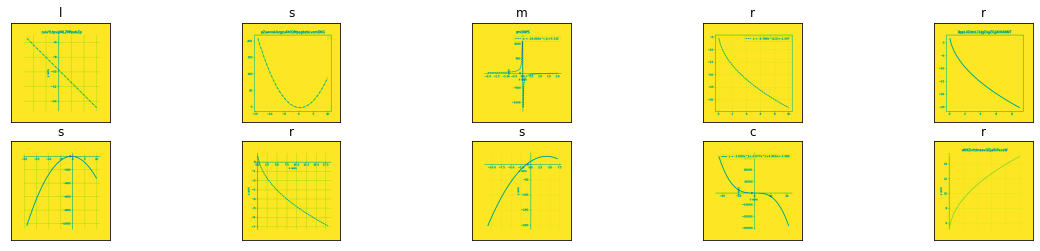

In [28]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(20,4))
for i in range(795,805):
  fig.add_subplot(2,5,i-794).set_title(train_labels[i])
  plt.imshow(train_imgs[i][:,:,0])
  plt.xticks(np.array([]))
  plt.yticks(np.array([]))

##7. build a vanilla CNN

In [51]:

def vanilla_cnn(in_shape=(250,250,1), n_classes=5, opt='Adam'):
    in_layer = layers.Input(in_shape, name='input')
    conv1 = layers.Conv2D(filters=32, kernel_size=3,
                          padding='valid', activation='relu', name='conv1')(in_layer)
    pool1 = layers.MaxPool2D( name='pool1')(conv1)
    conv2 = layers.Conv2D(filters=64, kernel_size=3,
                          padding='valid', activation='relu', name='cov2')(pool1)
    pool2 = layers.MaxPool2D( name='pool2')(conv2)
    conv3 = layers.Conv2D(filters=128, kernel_size=3,
                          padding='valid', activation='relu', name='cov3')(pool2)
    pool3 = layers.MaxPool2D( name='pool3')(conv3)
    dropout1 = Dropout(.5,name='dropout1')(pool3)
    flatten = layers.Flatten()(dropout1)
    
    dense1 = layers.Dense(500, activation='relu', name='dense1')(flatten)
    dropout2 = Dropout(.5,name='dropout2')(dense1)
    preds = layers.Dense(5, activation='softmax', name='output')(dropout2)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = vanilla_cnn()
    print(model.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 250, 250, 1)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 248, 248, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 124, 124, 32)      0         
_________________________________________________________________
cov2 (Conv2D)                (None, 122, 122, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 61, 61, 64)        0         
_________________________________________________________________
cov3 (Conv2D)                (None, 59, 59, 128)       73856     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 29, 29, 128)       0   

##8. train CNN

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
epochs=30
checkpoint = ModelCheckpoint("model.h5",monitor='val_loss',verbose=1,save_best_only=True,
                             save_weights_only= False,
                             mode ='auto',period=1)
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,mode='auto')

history = model.fit(train_imgs/255, train_labels_ohe, 
                    validation_data=(validation_imgs/255, validation_labels_ohe), epochs=epochs, batch_size=50, callbacks=[checkpoint,early])             


Epoch 1/30
140/140 [==============================] - 14s 100ms/step - loss: 0.9691 - accuracy: 0.6387 - val_loss: 0.0380 - val_accuracy: 0.9900

Epoch 00001: val_loss improved from inf to 0.03797, saving model to model.h5
Epoch 2/30
140/140 [==============================] - 14s 99ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0201 - val_accuracy: 0.9967

Epoch 00002: val_loss improved from 0.03797 to 0.02015, saving model to model.h5
Epoch 3/30
140/140 [==============================] - 14s 99ms/step - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.0117 - val_accuracy: 0.9987

Epoch 00003: val_loss improved from 0.02015 to 0.01171, saving model to model.h5
Epoch 4/30
140/140 [==============================] - 14s 100ms/step - loss: 0.0111 - accuracy: 0.9994 - val_loss: 0.0126 - val_accuracy: 0.9980

Epoch 00004: val_loss did not improve from 0.01171
Epoch 5/30
140/140 [==============================] - 14s 100ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0077 - val_

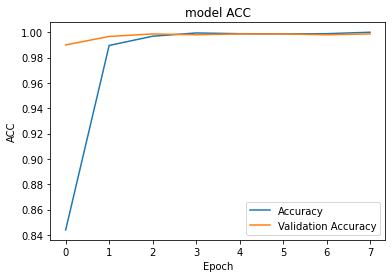

In [53]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model ACC")
plt.ylabel("ACC")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

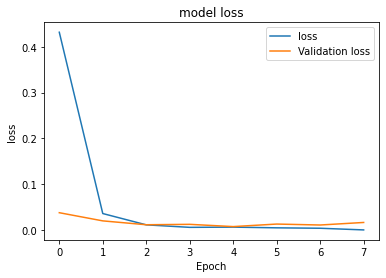

In [54]:
plt.plot(history.history["loss"]) 
plt.plot(history.history["val_loss"]) 
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation loss"])
plt.show()

##8. load CNN

In [55]:
from keras.models import load_model
basic_cnn= load_model('model.h5')
test_files = glob.glob('test-data/*')
test_imgs = [img_to_array(load_img(img, color_mode='grayscale', target_size=(250,250))) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('_')[1].strip()[0:1] for fn in test_files]
test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
test_labels_array = np.array(test_labels)
# integer encode
le = LabelEncoder()
test_integer_encoded = le.fit_transform(test_labels_array)
# binary encode
ohe = OneHotEncoder(sparse=False)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)
test_labels_ohe = ohe.fit_transform(test_integer_encoded)
print('Test dataset shape:', test_imgs.shape)
print(test_integer_encoded[0:5],test_labels_ohe[0:5])

Test dataset shape: (1750, 250, 250, 1)
[[1]
 [2]
 [2]
 [3]
 [0]] [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [56]:
import timeit

start = timeit.default_timer()
predictions = basic_cnn.predict(test_imgs_scaled, verbose=0)
stop = timeit.default_timer()
t =round(stop - start,2)
print('Time: ', t) 
predictions = ohe.inverse_transform(predictions)
predictions = le.inverse_transform(predictions)

Time:  1.16


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##9. evaluation

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels, predictions))
con_mat= confusion_matrix(test_labels, predictions,labels=['l','s','c','r','m'])

              precision    recall  f1-score   support

           c       0.99      1.00      1.00       350
           l       0.99      1.00      1.00       350
           m       1.00      1.00      1.00       350
           r       1.00      0.99      1.00       350
           s       1.00      0.99      1.00       350

    accuracy                           1.00      1750
   macro avg       1.00      1.00      1.00      1750
weighted avg       1.00      1.00      1.00      1750



In [61]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_norm

array([[1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


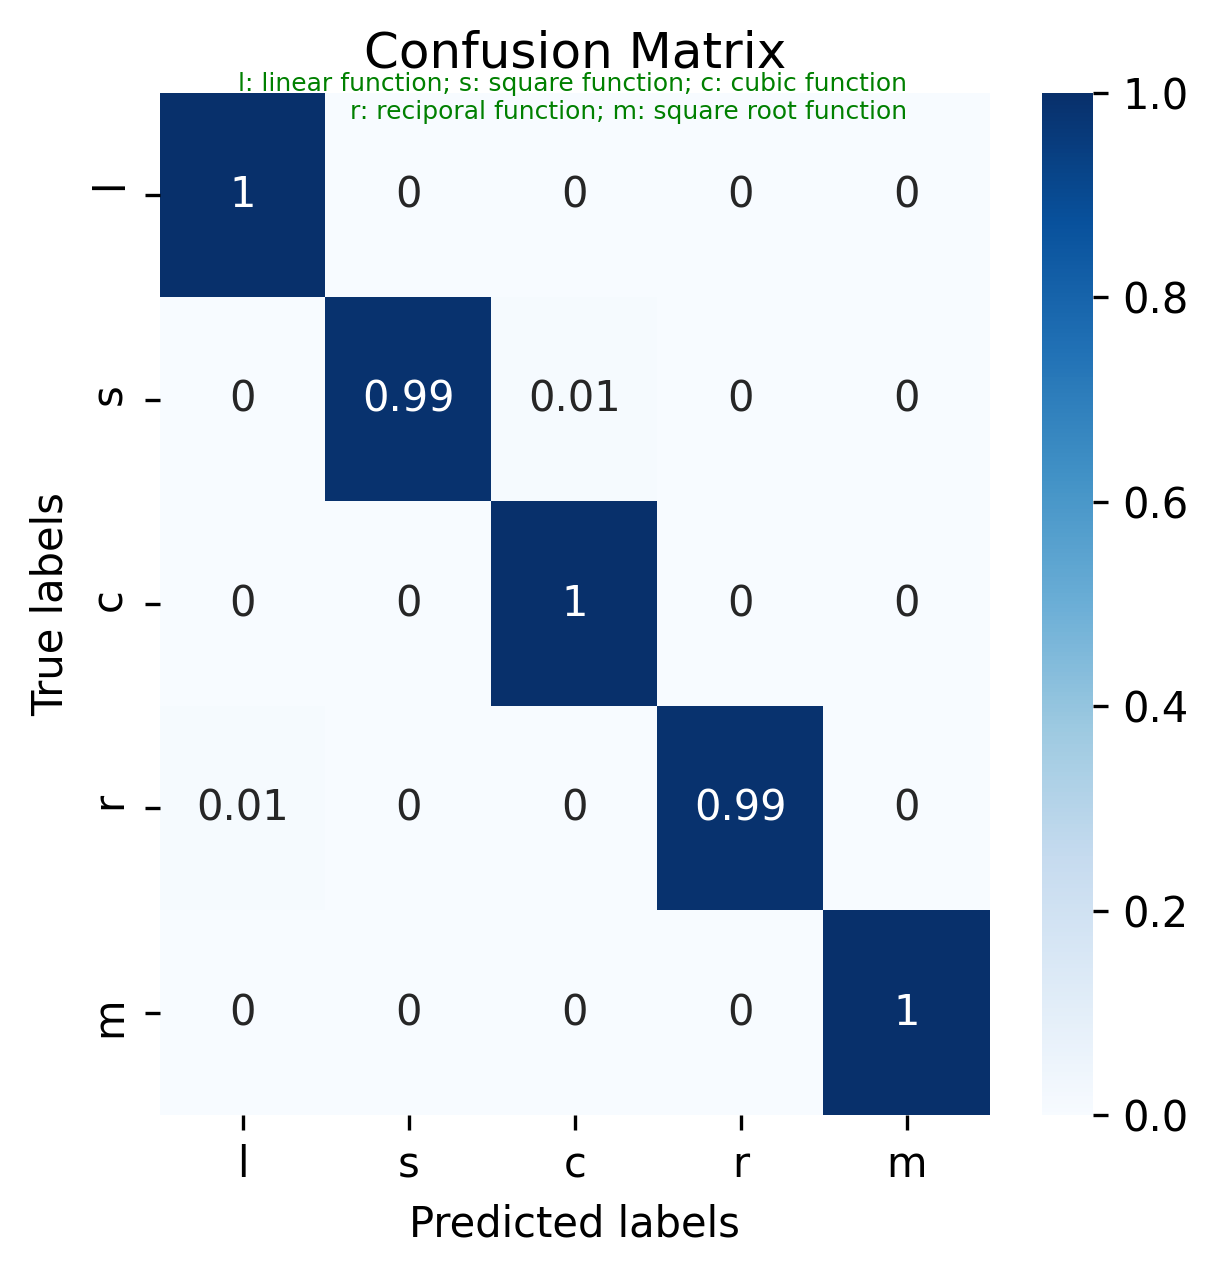

In [91]:
import seaborn as sns
figure = plt.figure(figsize=(4, 4),dpi=300)
ax = fig.add_subplot(1,1,1)
labels=['l','s','c','r','m']
ax= sns.heatmap(con_mat_norm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
ax.text(0.9, 0.97, 'l: linear function; s: square function; c: cubic function\nr: reciporal function; m: square root function',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=6)
plt.savefig('con_mat.jpg')

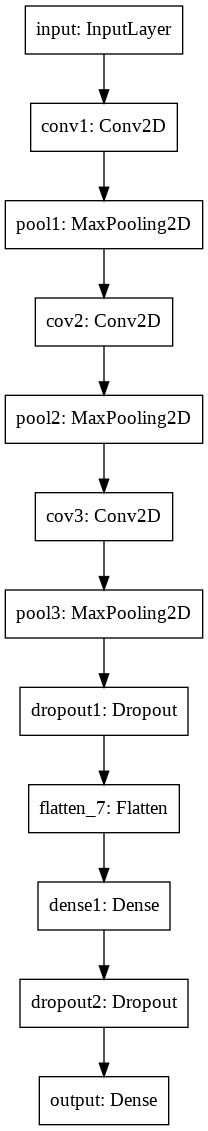

In [76]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
from google.colab import files
files.download('model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>